# **Enterprise Sales Reporting**
- Q1: What was the best month for sales? How much was earned that month?
- Q2: What city has the best sales?
- Q3: What time should we display ads to maximize the likelihood of customer's buying product?
- Q4: What product are most often sold together?
- Q5: What product sold the most? Why do you think it sold the most?

## Task 1: Import Packages and Load data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "C:\\Users\\Admin\\Desktop\\Sales_Reporting_Python\\sales data\\"

## Task 2: Clean and Preprocess data

### Task 2.1. Merge 12-month data

In [5]:
filepaths = []
frames = [ ]

for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)

df = result
df.to_csv('annualSales2019.csv', index = False)

### Task 2.2: Add 'Month' column

In [6]:
df["Month"] = df["Order Date"].str[:2]

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


*Checking the data type of Month*

In [7]:
print(set(df['Month'])) 
# => There are some trash value: Or, nan

{'10', nan, '01', 'Or', '04', '03', '11', '09', '07', '06', '02', '08', '12', '05'}


### Task 2.3: Get rid of 'Nan' and 'Or' value

In [8]:
df.loc[df['Month'] == 'nan']

df = df.dropna(how='all')

In [9]:
df = df[df['Month'] != 'Or']

df.loc[df['Month'] == 'Or']

df.shape

(185950, 7)

## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

In [10]:
# Create new column Sales = Quantity Ordered * Price Each

df['Sales'] = df['Quantity Ordered'].astype('float') * df['Price Each'].astype('float')

# Move column Sales after column Date

moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)

In [11]:
sales_value = df.groupby('Month').sum()['Sales']

In [12]:
sales_value

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

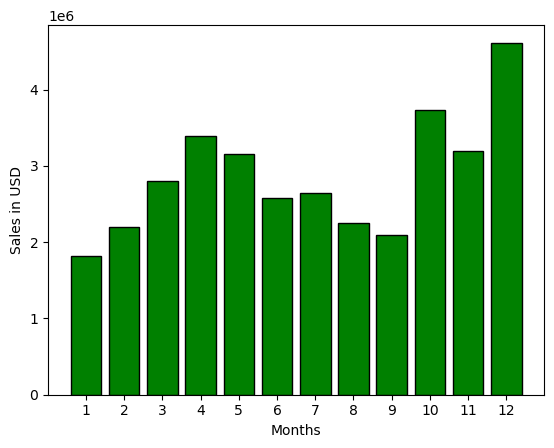

In [13]:
months = range(1,13)
plt.bar(x = months, height = sales_value, edgecolor = 'black', color = 'green')
plt.xticks(months);
plt.xlabel('Months');
plt.ylabel('Sales in USD');

### Task 3.2: What city has the best sales?

In [14]:
df['Purchase City'] = df['Purchase Address'].str.split(',').str[1]

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Purchase City
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [15]:
# Set the variable 
sales_value_by_city = df.groupby('Purchase City').sum()['Sales']

In [16]:
sales_value_by_city

Purchase City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [17]:
City_List = list(set(df['Purchase City']))

City_List

[' Austin',
 ' Atlanta',
 ' Los Angeles',
 ' Boston',
 ' Seattle',
 ' New York City',
 ' San Francisco',
 ' Dallas',
 ' Portland']

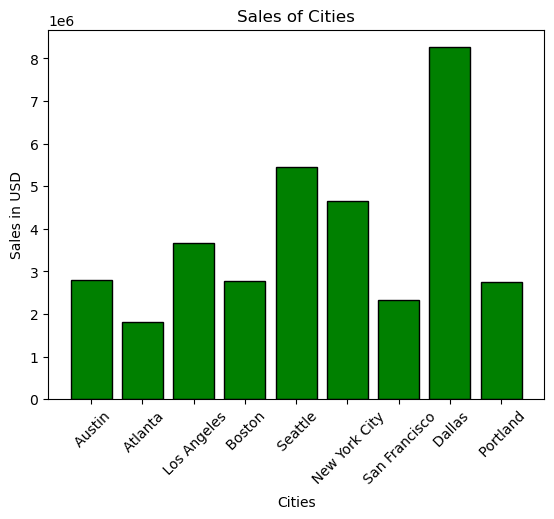

In [18]:
plt.bar(x = City_List, height = sales_value_by_city, edgecolor = 'black', color = 'green');
plt.xticks(rotation = 45);
plt.xlabel("Cities");
plt.ylabel("Sales in USD");
plt.title("Sales of Cities");


### Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [19]:
# Convert the data type

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column which is the hour of Order

df['Hours'] = df['Order Date'].dt.hour

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_27192\2092521960.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Purchase City,Hours
0,141234,iPhone,1,700,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles,20
11682,259354,iPhone,1,700,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco,16
11683,259355,iPhone,1,700,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,San Francisco,17


In [20]:
sales_value_by_hours = df.groupby('Hours').count()['Sales']

hour = range(0,24)

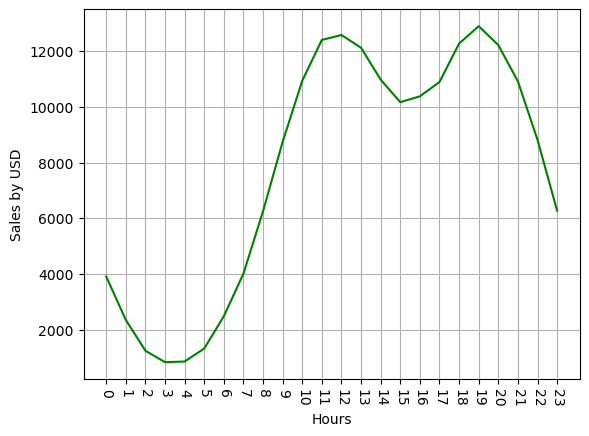

In [33]:
plt.plot(hour, sales_value_by_hours, color = 'green');
plt.grid();
plt.xticks(hour, rotation = -90);
plt.xlabel('Hours');
plt.ylabel('Sales by USD');

### Task 3.4: What product are most often sold together

In [22]:
# Return Order Date into string object
df['Order Date'] = df['Order Date'].astype(str)

In [23]:
df_dup = df[df['Order ID'].duplicated(keep=False)]

df_dup.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,Purchase City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8


In [24]:
groupProduct = df_dup.groupby('Order ID')['Product'].apply(lambda x: ','.join(x)).reset_index()

In [25]:
groupProduct['Product'].value_counts().head(10)

Product
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64

### Task 3.5: What product sold the most? Why do you think it sold the most

In [26]:
#Convert Quantity Ordered into int

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')


In [27]:
sales_value_by_product = df.groupby('Product').sum()['Quantity Ordered']

sales_value_by_product

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [28]:
product_list = [product for product, quant in sales_value_by_product.items()]

In [29]:
product_price = df.groupby('Product').mean(numeric_only=True)['Price Each']

product_price

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

C:\Users\Admin\AppData\Local\Temp\ipykernel_27192\201197960.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(product_list,rotation = 90);


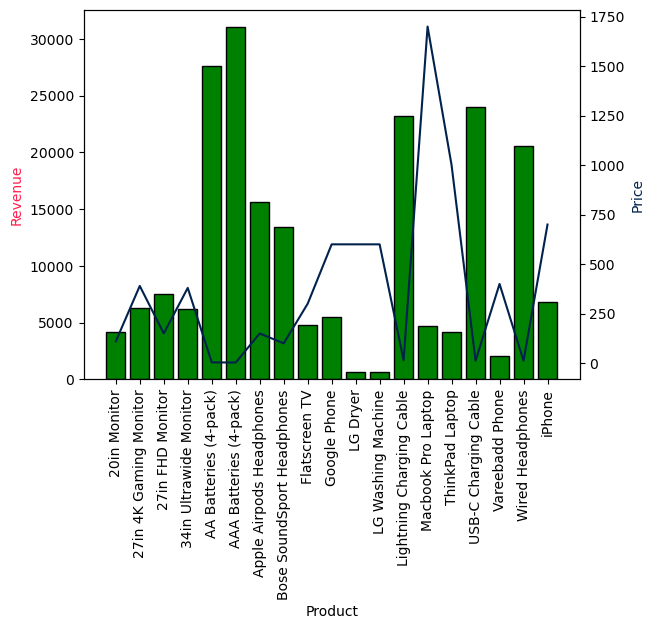

In [32]:
x = product_list
y1 = sales_value_by_product
y2 = product_price

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(x, y1, color = 'green', edgecolor = 'black')
ax2.plot(x, y2, c = '#00224D')

ax1.set_xticklabels(product_list,rotation = 90);
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue', c = '#FF204E')
ax2.set_ylabel('Price', c = '#00224D');

=> Từ biểu đồ trên có thể dễ dàng thấy 2 sản phẩm AA Batteries và AAA Batteries có doanh số bán hàng cao nhất và nhân tố giá là thứ có tác động tới điều này